# Projet OpenFoodFact

In [4]:
# TODO: import numpy, matplotlib and pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Présentation du contexte et de la base de donnée 

Notre base de données comprend 162 variables (colonnes) et 320 772 observations (individus). Gérée par Santé Publique France en collaboration avec l’association Open Food Facts, elle est en open source et accessible aussi bien aux particuliers qu’aux organisations. Son objectif est de fournir des informations détaillées sur la qualité nutritionnelle des produits alimentaires répertoriés.

De plus, cette base de données alimente l’application OpenFoodFacts. Cependant, l’analyse d’un extrait de données révèle un grand nombre de valeurs manquantes, affectant la quasi-totalité des variables.

# Nettoyage de la donnée :

In [5]:
# TODO: Import the dataset into the variable
OFF_df= pd.read_csv("fr.openfoodfacts.org.products.csv", sep="\t")
OFF_df.head()




/tmp/ipykernel_2498/2547113799.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  OFF_df= pd.read_csv("fr.openfoodfacts.org.products.csv", sep="\t")


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
pd.set_option('display.max_columns', 200)

In [7]:
pd.options.display.max_rows = 162
OFF_df.isnull().sum().sort_values(ascending=False)

water-hardness_100g                           320772
no_nutriments                                 320772
ingredients_that_may_be_from_palm_oil         320772
nutrition_grade_uk                            320772
nervonic-acid_100g                            320772
erucic-acid_100g                              320772
mead-acid_100g                                320772
elaidic-acid_100g                             320772
butyric-acid_100g                             320772
caproic-acid_100g                             320772
ingredients_from_palm_oil                     320772
lignoceric-acid_100g                          320772
cerotic-acid_100g                             320772
melissic-acid_100g                            320772
chlorophyl_100g                               320772
glycemic-index_100g                           320772
myristic-acid_100g                            320771
palmitic-acid_100g                            320771
caprylic-acid_100g                            

Choix de Features les plus pertinentes


Parmi l’ensemble des variables disponibles, j’en ai retenu 14, comprenant 9 variables numériques et 5 variables catégorielles, principalement destinées à l’identification des produits.

Les variables sélectionnées sont détaillées dans le code ci-dessous :

### Dénomination de l'application

### Choix des features les plus pertinentes

In [8]:
OFF_df=OFF_df[['code','countries_fr','product_name','energy_100g','nutrition_grade_fr','salt_100g','sodium_100g','sugars_100g','fat_100g','carbohydrates_100g','saturated-fat_100g','cholesterol_100g','proteins_100g']]

In [9]:
pd.set_option('display.max_columns', 200)
OFF_df

,code,countries_fr,product_name,energy_100g,nutrition_grade_fr,salt_100g,sodium_100g,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,cholesterol_100g,proteins_100g
0,3087,France,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,États-Unis,Banana Chips Sweetened (Whole),2243.0,d,0.00000,0.000,14.29,28.57,64.29,28.57,0.018,3.57
2,4559,États-Unis,Peanuts,1941.0,b,0.63500,0.250,17.86,17.86,60.71,0.00,0.000,17.86
3,16087,États-Unis,Organic Salted Nut Mix,2540.0,d,1.22428,0.482,3.57,57.14,17.86,5.36,NaN,17.86
4,16094,États-Unis,Organic Polenta,1552.0,NaN,NaN,NaN,NaN,1.43,77.14,NaN,NaN,8.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,Roumanie,Tomato & ricotta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,États-Unis,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",0.0,b,0.00000,0.000,0.00,0.00,0.00,0.00,0.000,0.00
320769,9970229501521,Chine,乐吧泡菜味薯片,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,France,Tomates aux Vermicelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
OFF_df.isnull().sum().sort_values(ascending=False)

cholesterol_100g      176682
nutrition_grade_fr     99562
saturated-fat_100g     91218
carbohydrates_100g     77184
fat_100g               76881
sugars_100g            75801
sodium_100g            65309
salt_100g              65262
proteins_100g          60850
energy_100g            59659
product_name           17762
countries_fr             280
code                      23
dtype: int64

 La méthode .dropna(subset=...) permet de supprimer uniquement les lignes où certaines colonnes contiennent des valeurs manquantes (NaN), sans affecter les autres.

In [11]:
OFF_df_clean=OFF_df.dropna(subset=['code','countries_fr','product_name','energy_100g','nutrition_grade_fr','salt_100g','sodium_100g','sugars_100g','fat_100g','carbohydrates_100g','saturated-fat_100g','cholesterol_100g','proteins_100g'])
OFF_df_clean

,code,countries_fr,product_name,energy_100g,nutrition_grade_fr,salt_100g,sodium_100g,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,cholesterol_100g,proteins_100g
1,4530,États-Unis,Banana Chips Sweetened (Whole),2243.0,d,0.00000,0.000,14.29,28.57,64.29,28.57,0.018,3.57
2,4559,États-Unis,Peanuts,1941.0,b,0.63500,0.250,17.86,17.86,60.71,0.00,0.000,17.86
65,32117,États-Unis,Tricolor Tortellini,1611.0,c,1.13284,0.446,1.54,9.23,60.00,3.08,0.077,13.85
70,33060,États-Unis,10-Grain Pancake Mix,1297.0,c,2.75844,1.086,5.17,1.72,60.34,0.86,0.009,13.79
77,33640,États-Unis,Granola Cranberry And Acai,1824.0,c,0.25400,0.100,25.45,10.91,74.55,0.91,0.000,9.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320664,95656335,États-Unis,Chipotle Peppers In Adobo Sauce,280.0,c,3.21818,1.267,6.67,0.00,16.67,0.00,0.000,0.00
320665,95659305,États-Unis,Dal Makhani,502.0,b,1.37160,0.540,0.00,5.33,13.33,1.00,0.007,4.67
320738,9780803738782,États-Unis,Organic Z Bar,1393.0,d,0.95250,0.375,30.56,9.72,61.11,2.78,0.000,5.56
320742,9787461062105,États-Unis,Natural Cassava,1477.0,a,0.03048,0.012,2.35,0.00,87.06,0.00,0.000,1.18


In [12]:
OFF_df_clean.reset_index(drop=True, inplace=True)

In [13]:
OFF_df_clean.shape

(136838, 13)

In [14]:
OFF_df_clean.isnull().sum().sort_values(ascending=False)

code                  0
countries_fr          0
product_name          0
energy_100g           0
nutrition_grade_fr    0
salt_100g             0
sodium_100g           0
sugars_100g           0
fat_100g              0
carbohydrates_100g    0
saturated-fat_100g    0
cholesterol_100g      0
proteins_100g         0
dtype: int64

In [15]:
#print(OFF_df_clean.duplicated().sum())  # Nombre de lignes dupliquées
#OFF_df_clean= OFF_df_clean.drop_duplicates()  # Supprimer les doublons si nécessaire

In [16]:
OFF_df_clean["cholesterol_100g"].value_counts()

0.0000    84797
0.0710     2235
0.1070     2074
0.0120     1898
0.0540     1569
          ...  
0.0707        1
0.2420        1
0.2310        1
0.2580        1
0.0004        1
Name: cholesterol_100g, Length: 493, dtype: int64

Nous utilisons la methode de "Fillna" pour remplacement des valeurs manquantes par zero

In [17]:
#Remplacer les valeurs manquantes par "0"
OFF_df_clean["cholesterol_100g"].fillna(0, inplace=True)


/tmp/ipykernel_2498/2570612952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OFF_df_clean["cholesterol_100g"].fillna(0, inplace=True)


In [18]:
pd.options.display.max_rows = 162
OFF_df_clean.isnull().sum().sort_values(ascending=False)

code                  0
countries_fr          0
product_name          0
energy_100g           0
nutrition_grade_fr    0
salt_100g             0
sodium_100g           0
sugars_100g           0
fat_100g              0
carbohydrates_100g    0
saturated-fat_100g    0
cholesterol_100g      0
proteins_100g         0
dtype: int64

In [19]:
OFF_df.isnull().sum().sort_values(ascending=False)

cholesterol_100g      176682
nutrition_grade_fr     99562
saturated-fat_100g     91218
carbohydrates_100g     77184
fat_100g               76881
sugars_100g            75801
sodium_100g            65309
salt_100g              65262
proteins_100g          60850
energy_100g            59659
product_name           17762
countries_fr             280
code                      23
dtype: int64

In [20]:
#Suppression de la variable "proteins_100g"
OFF_df = OFF_df.drop(['protein_100g'], axis=1, errors='ignore')



In [21]:
OFF_df.reset_index(drop=True, inplace=True)

In [22]:
OFF_df.head()

,code,countries_fr,product_name,energy_100g,nutrition_grade_fr,salt_100g,sodium_100g,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,cholesterol_100g,proteins_100g
0,3087,France,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,États-Unis,Banana Chips Sweetened (Whole),2243.0,d,0.00000,0.000,14.29,28.57,64.29,28.57,0.018,3.57
2,4559,États-Unis,Peanuts,1941.0,b,0.63500,0.250,17.86,17.86,60.71,0.00,0.000,17.86
3,16087,États-Unis,Organic Salted Nut Mix,2540.0,d,1.22428,0.482,3.57,57.14,17.86,5.36,NaN,17.86
4,16094,États-Unis,Organic Polenta,1552.0,NaN,NaN,NaN,NaN,1.43,77.14,NaN,NaN,8.57


In [23]:
OFF_df.describe()

,energy_100g,salt_100g,sodium_100g,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,cholesterol_100g,proteins_100g
count,2.611130e+05,255510.000000,255463.000000,244971.000000,243891.000000,243588.000000,229554.000000,144090.000000,259922.000000
mean,1.141915e+03,2.028624,0.798815,16.003484,12.730379,32.073981,5.129932,0.020071,7.075940
std,6.447154e+03,128.269454,50.504428,22.327284,17.578747,29.731719,8.014238,0.358062,8.409054
min,0.000000e+00,0.000000,0.000000,-17.860000,0.000000,0.000000,0.000000,0.000000,-800.000000
25%,3.770000e+02,0.063500,0.025000,1.300000,0.000000,6.000000,0.000000,0.000000,0.700000
50%,1.100000e+03,0.581660,0.229000,5.710000,5.000000,20.600000,1.790000,0.000000,4.760000
75%,1.674000e+03,1.374140,0.541000,24.000000,20.000000,58.330000,7.140000,0.020000,10.000000
max,3.251373e+06,64312.800000,25320.000000,3520.000000,714.290000,2916.670000,550.000000,95.238000,430.000000


# Partie Visualisation

## Corrélation entre graisse saturé et energie 

 Ce graphique permet de visualiser comment la quantité de matières grasses influence la valeur énergétique des aliments.

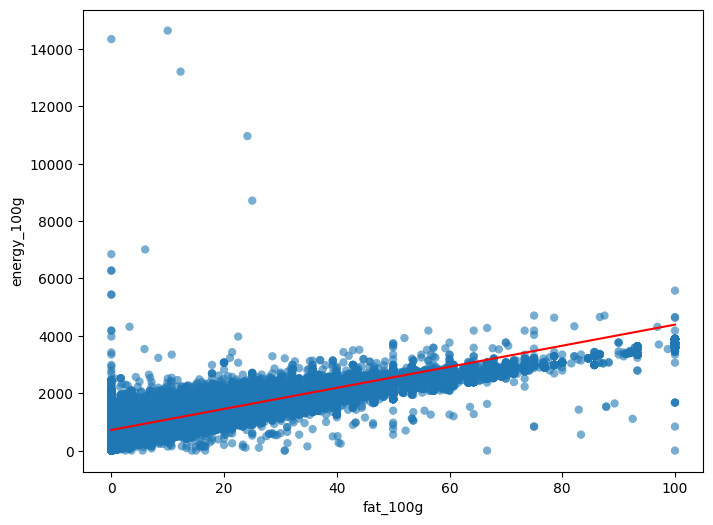

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création du scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(data=OFF_df_clean, x="fat_100g", y="energy_100g", alpha=0.6, edgecolor="none")

# Ajout d'une ligne de tendance
sns.regplot(data=OFF_df_clean, x="fat_100g", y="energy_100g", scatter=False, color="red", line_kws={"linewidth": 1.5})

plt.show()



## Ratio Lipides / Protéines
Indique si un produit est principalement composé de lipides ou de protéines.

In [25]:
# Calcul du ratio Lipides / Protéines
OFF_df_clean["fat_protein_ratio"] = OFF_df_clean["fat_100g"] / (OFF_df_clean["proteins_100g"] + 1)

# Affichage des 5 premières lignes pour vérification
print(OFF_df_clean[["fat_100g", "proteins_100g", "fat_protein_ratio"]].head())


   fat_100g  proteins_100g  fat_protein_ratio
0     28.57           3.57           6.251641
1     17.86          17.86           0.946978
2      9.23          13.85           0.621549
3      1.72          13.79           0.116295
4     10.91           9.09           1.081269


/tmp/ipykernel_2498/670960343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OFF_df_clean["fat_protein_ratio"] = OFF_df_clean["fat_100g"] / (OFF_df_clean["proteins_100g"] + 1)


Que peut-on en déduire ?

1) La plupart des produits sont équilibrés en protéines et lipides (ratio proche de 0).
2) Certains produits sont extrêmement riches en lipides.


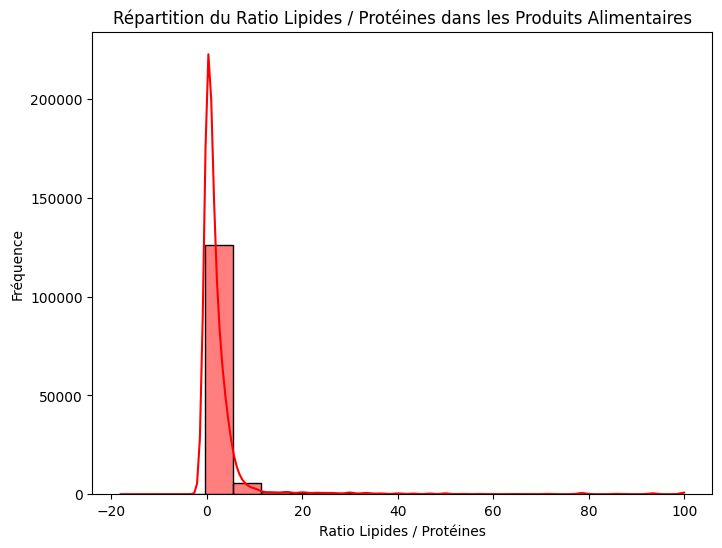

In [26]:

# Création de la figure
plt.figure(figsize=(8,6))

# Histogramme avec Seaborn
sns.histplot(OFF_df_clean["fat_protein_ratio"], bins=20, kde=True, color="red")

# Ajout des labels et du titre
plt.xlabel("Ratio Lipides / Protéines")
plt.ylabel("Fréquence")
plt.title("Répartition du Ratio Lipides / Protéines dans les Produits Alimentaires")

# Affichage du graphique
plt.show()


In [31]:
# Calcul du ratio Lipides / Protéines
OFF_df_clean["sugar_carb_ratio"] = OFF_df_clean["sugars_100g"] / (OFF_df_clean["carbohydrates_100g"] + 1)

# Affichage des 5 premières lignes pour vérification
print(OFF_df_clean[["sugars_100g", "carbohydrates_100g", "sugar_carb_ratio"]].head())

   sugars_100g  carbohydrates_100g  sugar_carb_ratio
0        14.29               64.29          0.218870
1        17.86               60.71          0.289418
2         1.54               60.00          0.025246
3         5.17               60.34          0.084284
4        25.45               74.55          0.336863


/tmp/ipykernel_2498/3485223711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OFF_df_clean["sugar_carb_ratio"] = OFF_df_clean["sugars_100g"] / (OFF_df_clean["carbohydrates_100g"] + 1)


## Ratio Sucre / Glucides

On peut en déduire que la majorité des produits alimentaires ont une faible proportion de sucre par rapport aux glucides totaux, ce qui est logique puisque les glucides incluent aussi des éléments comme l'amidon et les fibres. Les valeurs plus élevées, bien que rares, pourraient correspondre à des aliments très sucrés (comme des bonbons ou des sodas)

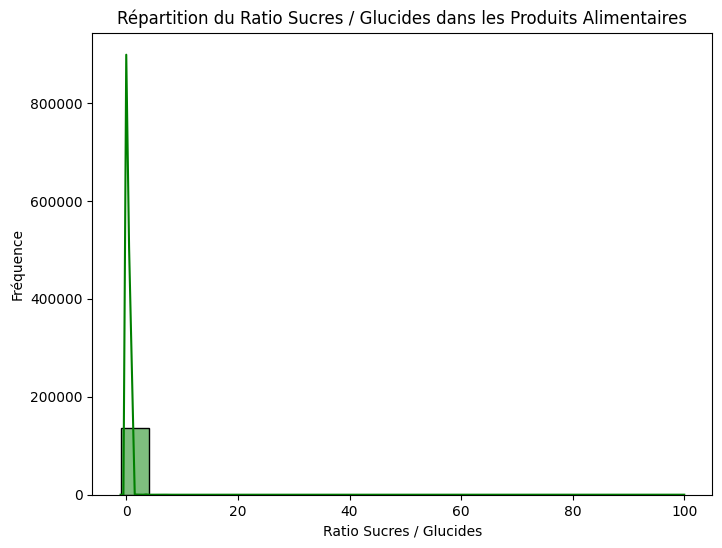

In [32]:


# Création de l'histogramme pour la répartition du ratio Sucres / Glucides
plt.figure(figsize=(8,6))
sns.histplot(OFF_df_clean["sugar_carb_ratio"], bins=20, kde=True, color="green")

# Ajout des labels et titre
plt.xlabel("Ratio Sucres / Glucides")
plt.ylabel("Fréquence")
plt.title("Répartition du Ratio Sucres / Glucides dans les Produits Alimentaires")

# Affichage du graphique
plt.show()
